In [1]:
import learning
from IPython.core import display as ICD

X, y = learning.get_training_data(2015, "Goals")

# Goals

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

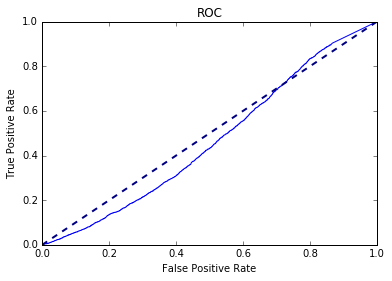

[[16080     0]
 [ 2641     0]]


In [4]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 20), random_state=1)
clf.fit(X, y)
learning.visualize(clf, X, y)